# Likelihood contourf with heavy nonminimal model

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
import pandas as pd

from Likelihood import LEff
from mcmc_utils import labels_fancy
from dark_nus_utils import load_datasets
from const import alphaQED

In [3]:
hierarchy = 'heavy'
D_or_M = 'majorana'
distance = 'log'
smoothing_pars = (0.1, 0.1)

selection = 'cut_based'

spec = 'non minimal'

In [4]:
levels = {0.68: -2.3/2,
          0.9: -4.61/2,
          0.95: -5.99/2}

In [5]:
my_exp_analysis = load_datasets(hierarchy, D_or_M, timeit=True, direct_load_objects=True)[f'{hierarchy}_{D_or_M}']

heavy majorana
Wall time: 0.6105353832244873 s, CPU time: 0.5996631579999998


In [6]:
from ctau_utils import ctau_heavy
def heavy_nonminimal_posterior(m4=0.1, mz=1.25, Umu4_2=2.2e-7, Ud4_2=0.01, alpha_d=0.4, epsilon=2.1e-2):
    Vmu4_alpha_epsilon2 = alpha_d * Umu4_2 * alphaQED * epsilon**2
    Valpha4_alpha_epsilon2 = alpha_d * Ud4_2 * alphaQED * epsilon**2
    ctau = ctau_heavy(m4, 
                      mz, 
                      Valpha4_alpha_epsilon2, 
                      D_or_M)
    this_mu = Vmu4_alpha_epsilon2/my_exp_analysis.Vmu4_alpha_epsilon2
    mu, sigma2 = my_exp_analysis.kde_n_events(df=my_exp_analysis.df_base.query('cut_based'),
                                                     m4mz=(m4, mz),
                                                     ctau=ctau,
                                                     mu=this_mu,
                                                     distance=distance,
                                                     smoothing=smoothing_pars)
    return LEff(0, mu, sigma2), mu, sigma2, ctau

In [7]:
heavy_nonminimal_posterior_v = np.vectorize(heavy_nonminimal_posterior)

## Varying $|U_{D4}|^2$

In [8]:
# setting
m4 = np.geomspace(my_exp_analysis.m4_limits[0],
                  my_exp_analysis.m4_limits[1],
                  20)
Umu4_2 = np.geomspace(1e-11,
                      1e-6,
                      25)
m4, Umu4_2 = np.meshgrid(m4, Umu4_2)

hnl_Ud4_2_s = [1, 1e-2, 1e-4]

In [10]:
# calculation
hnl_constraints = {}
for Ud4_2 in hnl_Ud4_2_s:
    hnl_constraints[Ud4_2] = heavy_nonminimal_posterior_v(m4=m4, Umu4_2=Umu4_2, Ud4_2=Ud4_2)

Text(0, 0.5, '$|U_{{\\mu 4}}|^2$')

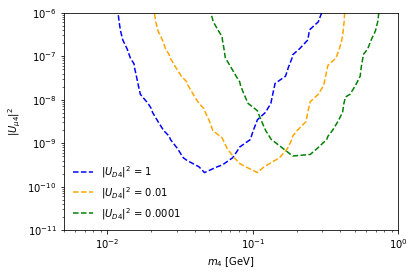

In [11]:
# plot
colors = ['blue', 'orange', 'green']
contours = {}
for Ud4_2, color in zip(hnl_Ud4_2_s, colors):
    contours[Ud4_2] = plt.contour(m4, Umu4_2, hnl_constraints[Ud4_2][0], levels=[levels[0.9]], colors=[color])
plt.legend([cntr.legend_elements()[0][0] for cntr in contours.values()], 
           [f'$|U_{{D4}}|^2$ = {Ud4_2}' for Ud4_2 in contours.keys()],
           frameon=False,
           loc='lower left')
plt.loglog()
plt.xlabel(r'$m_4$ [GeV]')
plt.ylabel(r'$|U_{{\mu 4}}|^2$')

## Dark photon plots

In [ ]:
# setting
mz = np.geomspace(0.11, my_exp_analysis.mz_limits[1], 10)
epsilon = np.geomspace(1e-6, 1e-1, 8)
mz, epsilon = np.meshgrid(mz, epsilon)

dark_photons_Ud4_2_s = [1, 1e-2, 1e-4, 2.2e-7]

In [ ]:
# calculation
dark_photons_constraints = {}
for Ud4_2 in dark_photons_Ud4_2_s:
    dark_photons_constraints[Ud4_2] = heavy_nonminimal_posterior_v(mz=mz, epsilon=epsilon, Ud4_2=Ud4_2)

In [ ]:
# plot
colors = ['blue', 'orange', 'green', 'purple']
contours = {}
for Ud4_2, color in zip(dark_photons_Ud4_2_s, colors):
    contours[Ud4_2] = plt.contour(mz, epsilon, dark_photons_constraints[Ud4_2][0], 
                                  levels=[levels[0.9]], colors=[color])
plt.legend([cntr.legend_elements()[0][0] for cntr in contours.values()], 
           [f'$|U_{{D4}}|^2$ = {Ud4_2}' if Ud4_2!=2.2e-7 else f'$|U_{{D4}}|^2 = |U_{{\mu4}}|^2$' for Ud4_2 in contours.keys()],
           frameon=False,
           loc='lower right')
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')

In [ ]:
# plot
lifetimes = [1, 10, 100]
colors = ['blue', 'orange', 'green']
contour = plt.contour(mz, epsilon, out[0.1][3], levels=lifetimes, colors=colors)
plt.legend(contour.legend_elements()[0], 
           [f'$c \\tau$ = {lifetime} cm' for lifetime in lifetimes],
           frameon=False,
           loc='upper left')
plt.loglog()
plt.xlabel(r'$m_z$ [GeV]')
plt.ylabel(r'$\epsilon$')